In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

**Question 1**

In [2]:
companydata = pd.read_csv('Company_Data.csv')

In [3]:
companydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
companydata.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [5]:
labels=['bad','average','good']
bins=[0,5,10,17]
companydata['Sales']=pd.cut(companydata['Sales'],bins=bins,labels=labels)

In [6]:
companydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,average,138,73,11,276,120,Bad,42,17,Yes,Yes
1,good,111,48,16,260,83,Good,65,10,Yes,Yes
2,good,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,bad,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,good,138,108,17,203,128,Good,33,14,Yes,Yes
396,average,139,23,3,37,120,Medium,55,11,No,Yes
397,average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,average,100,79,7,284,95,Bad,50,12,Yes,Yes


In [7]:
companydata.dtypes

Sales          category
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc        object
Age               int64
Education         int64
Urban            object
US               object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [11]:
string_columns = ["Sales","ShelveLoc","Urban","US"]

for x in string_columns:
    companydata[x] = companydata[x].astype(str)

for i in string_columns:
    number = preprocessing.LabelEncoder()
    companydata[i] = number.fit_transform(companydata[i])

In [12]:
companydata

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,2,111,48,16,260,83,1,65,10,1,1
2,2,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,2,138,108,17,203,128,1,33,14,1,1
396,0,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,0,100,79,7,284,95,0,50,12,1,1


In [13]:
x=companydata.iloc[:,1:]
y=companydata['Sales']

In [14]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [15]:
y

0      0
1      2
2      2
3      0
4      1
      ..
395    2
396    0
397    0
398    0
399    0
Name: Sales, Length: 400, dtype: int32

In [16]:
companydata.Sales.value_counts()

0    245
2     78
1     76
3      1
Name: Sales, dtype: int64

In [17]:
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

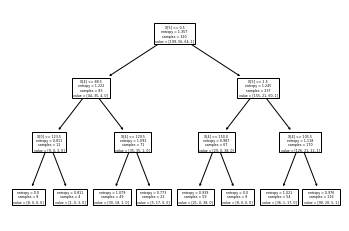

In [19]:
tree.plot_tree(model);

In [20]:
preds = model.predict(x_test)

In [21]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Sales,,,
0,36,2,8
1,17,2,1
2,6,0,8


In [22]:
np.mean(preds==y_test)

0.575

**Question 2**

In [23]:
fraudcheck = pd.read_csv('Fraud_check.csv')

In [24]:
fraudcheck 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [25]:
Data = fraudcheck.rename({'Marital.Status': 'Marital_Status','Taxable.Income':'Taxable_Income',
                          'City.Population':'City_Population','Work.Experience':'Work_Experience'}, axis=1)

In [26]:
labels=['Good','Risky']
bins=[10003,50000,99620]
Data['Taxable_Income']=pd.cut(Data['Taxable_Income'],bins=bins,labels=labels)

In [30]:
from sklearn import preprocessing
string_columns = ["Taxable_Income","Urban","Marital_Status","Undergrad"]  

for x in string_columns:
    Data[x] = Data[x].astype(str)
    
for i in string_columns:
    number = preprocessing.LabelEncoder()
    Data[i] = number.fit_transform(Data[i])

In [31]:
Data

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,0,2,1,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,0,154058,0,1
598,1,1,1,180083,17,0


In [45]:
x1=Data[['Undergrad','Marital_Status','City_Population','Work_Experience','Urban']]
y1=Data['Taxable_Income']

In [46]:
x1

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [47]:
y1

0      1
1      0
2      0
3      1
4      1
      ..
595    1
596    1
597    0
598    1
599    1
Name: Taxable_Income, Length: 600, dtype: int32

In [48]:
x_train1, x_test1,y_train1,y_test1 = train_test_split(x1,y1, test_size=0.2,random_state=40)

In [50]:
model1 = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model1.fit(x_train1,y_train1)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

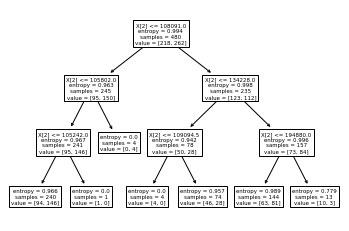

In [51]:
tree.plot_tree(model1);

In [53]:
preds1 = model1.predict(x_test1)

In [54]:
pd.crosstab(y_test1,preds1)

col_0,0,1
Taxable_Income,,
0,14,37
1,9,59
2,0,1


In [55]:
np.mean(preds1==y_test1)

0.6083333333333333